<a href="https://colab.research.google.com/github/prishaashi/ashi/blob/main/TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/housing (1).csv",  header=None, delim_whitespace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B', 'LSTAT','MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


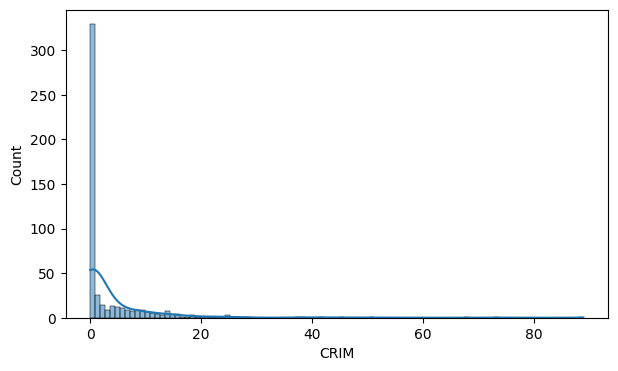

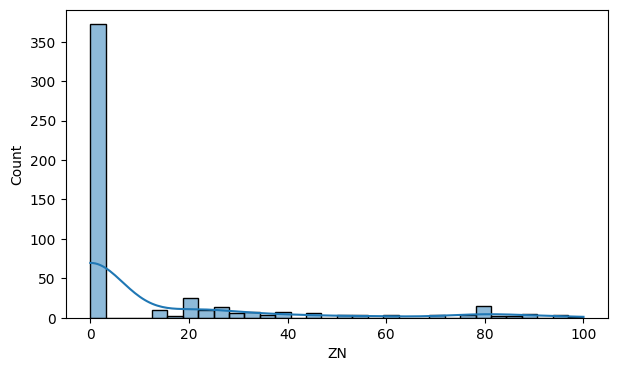

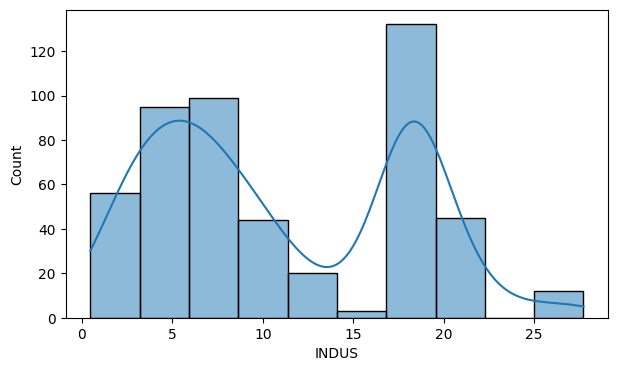

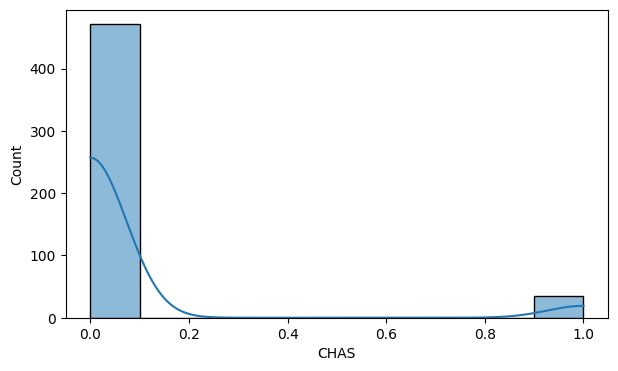

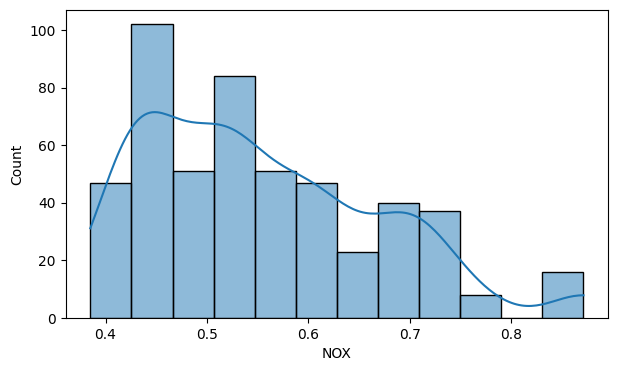

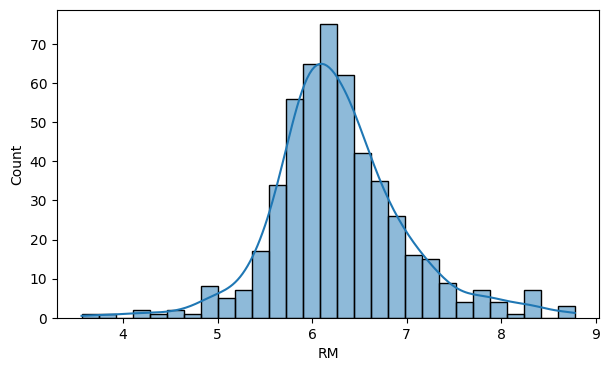

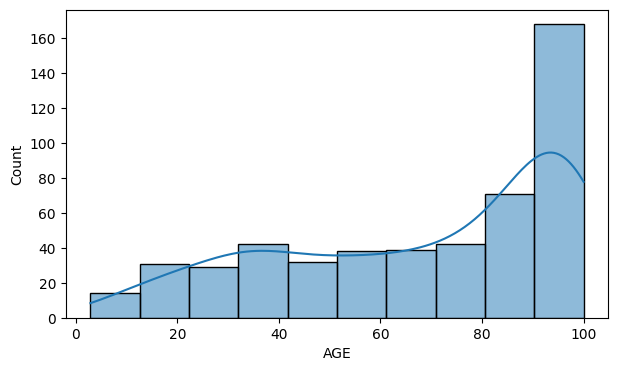

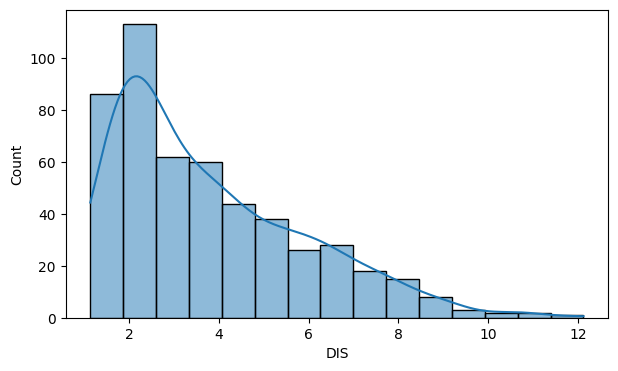

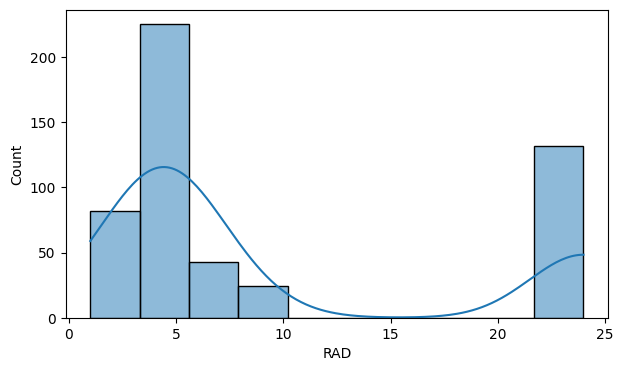

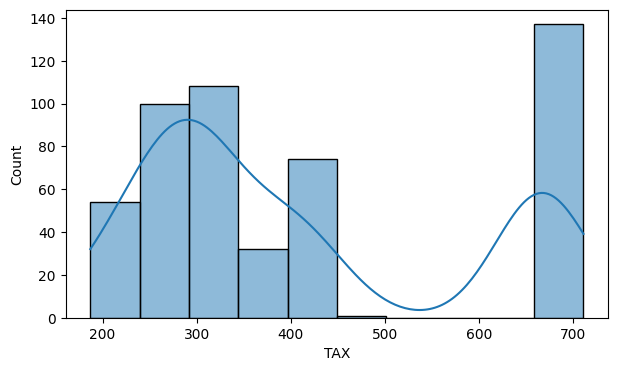

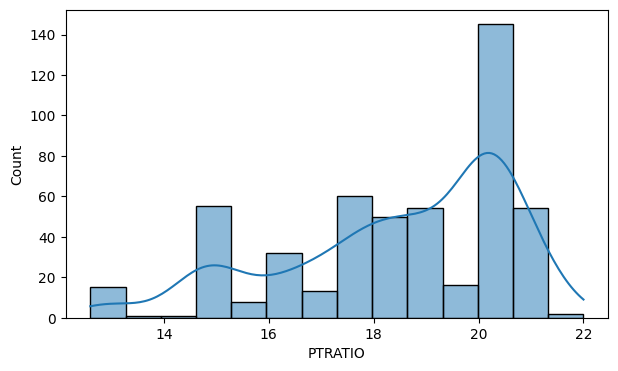

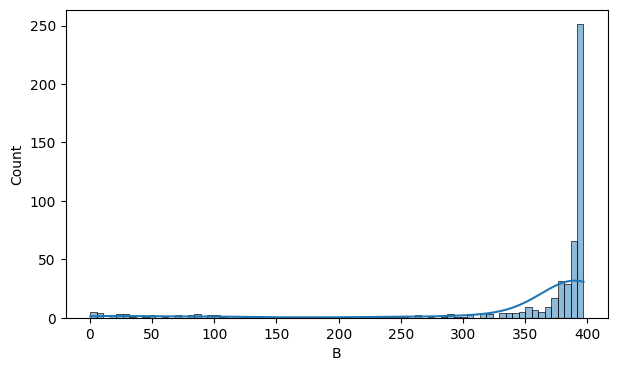

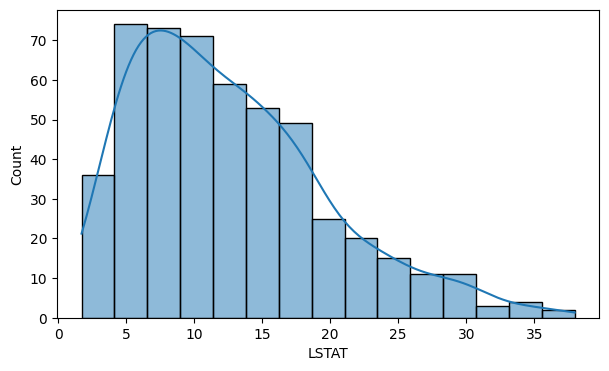

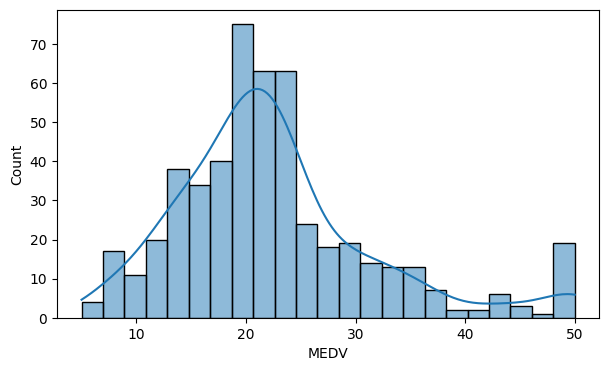

In [ ]:
for i in df.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=i, kde = True)
    plt.show()

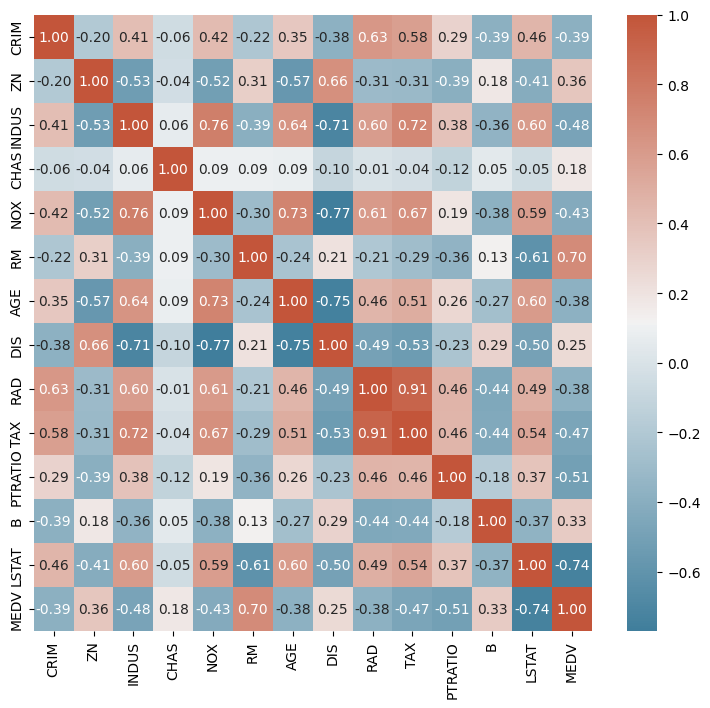

In [ ]:
plt.figure(figsize=(9,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap=cmap )
plt.show()

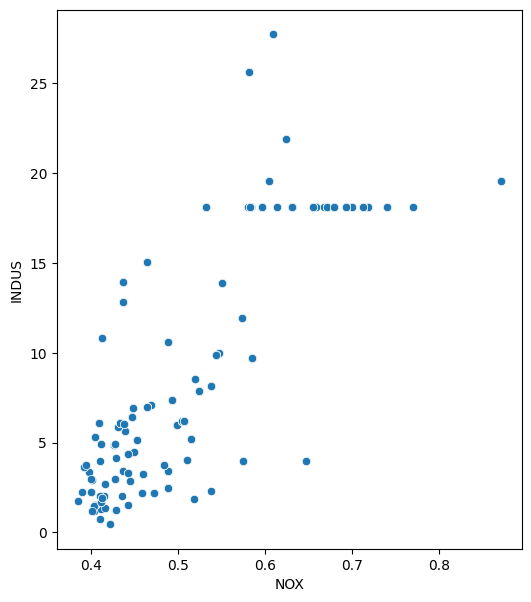

In [ ]:
plt.figure(figsize=(6, 7))
sns.scatterplot(x=df['NOX'], y=df['INDUS'], data=df)
plt.show()

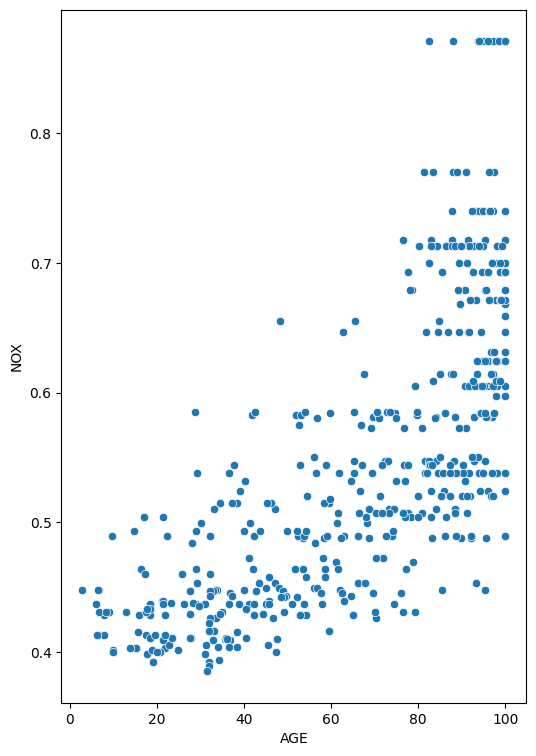

In [ ]:
plt.figure(figsize=(6, 9))
sns.scatterplot(x=df['AGE'], y=df['NOX'], data=df)

plt.show()

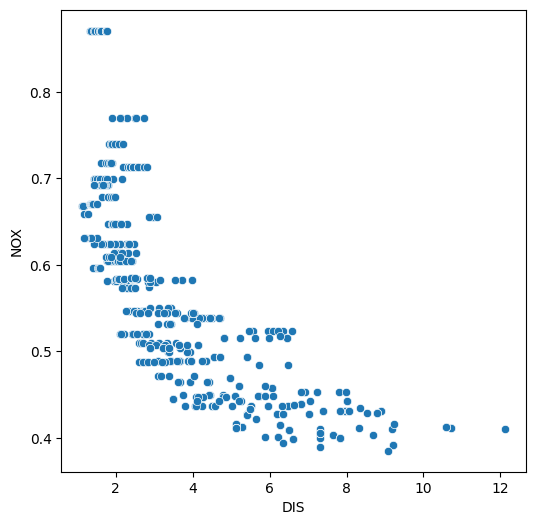

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(y=df['NOX'], x=df['DIS'], data=df)

plt.show()


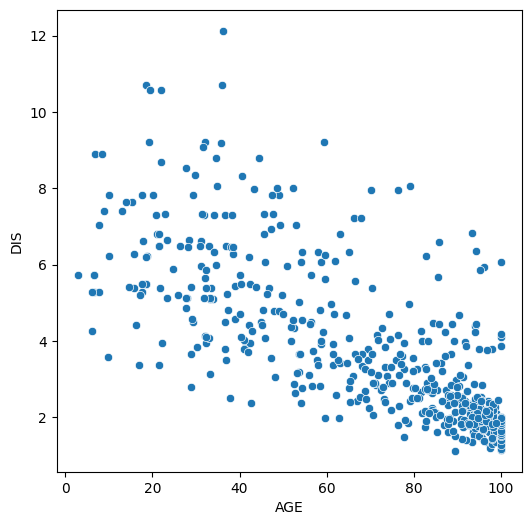

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'DIS', data = df)
plt.show()

In [ ]:
df['MEDV_log'] = np.log(df['MEDV'])

<Axes: xlabel='MEDV_log', ylabel='Count'>

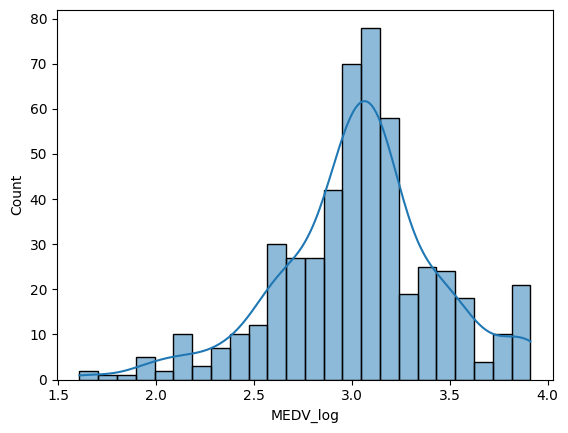

In [ ]:
sns.histplot(data=df, x='MEDV_log', kde = True)

In [ ]:
Y = df['MEDV_log']
X = df.drop(columns = {'MEDV', 'MEDV_log'})

X = sm.add_constant(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  585.099960
1      CRIM    1.993439
2        ZN    2.743911
3     INDUS    4.004462
4      CHAS    1.078490
5       NOX    4.430555
6        RM    1.879494
7       AGE    3.155351
8       DIS    4.361514
9       RAD    8.369185
10      TAX   10.194047
11  PTRATIO    1.948555
12        B    1.385213
13    LSTAT    2.926462


In [ ]:

from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [ ]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', 1.0893909031917068), ('p-value', 0.29208326691044917)]

In [ ]:
model1 = sm.OLS(y_train, X_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     95.56
Date:                Mon, 18 Mar 2024   Prob (F-statistic):          2.97e-101
Time:                        04:58:15   Log-Likelihood:                 78.262
No. Observations:                 354   AIC:                            -130.5
Df Residuals:                     341   BIC:                            -80.22
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4999      0.253     17.767      0.000       4.002       4.998
CRIM          -0.0122      0.002     -7.005      0.000      -0.016      -0.009
ZN             0.0010      0.001      1.417      0.157      -0.000       0.002
INDUS         -0.0002      0.003     -0.066      0.947      -0.006       0.005
CHAS           0.1164      0.039      3.008      0.003       0.040       0.193
NOX           -1.0297      0.187     -5.509      0.000      -1.397      -0.662
RM             0.0569      0.021      2.734      0.007       0.016       0.098
AGE            0.0003      0.001      0.390      0.697      -0.001       0.002
DIS           -0.0496      0.010     -4.841      0.000      -0.070      -0.029
RAD            0.0080      0.002      3.885      0.000       0.004       0.012
PTRATIO       -0.0458      0.007     -6.762      0.000      -0.059      -0.033
B              0.0002      0.000      1.796      0.073   -2.35e-05       0.001
LSTAT         -0.0291      0.002    -11.772      0.000      -0.034      -0.024
==============================================================================
Omnibus:                       33.707   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.726
Skew:                           0.387   Prob(JB):                     1.34e-22
Kurtosis:                       5.496   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
Y = df['MEDV_log']
X = df.drop(columns = {'MEDV', 'MEDV_log', 'ZN', 'AGE', 'INDUS', 'TAX'})
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)


model2 = sm.OLS(y_train, X_train).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     127.5
Date:                Mon, 18 Mar 2024   Prob (F-statistic):          6.21e-104
Time:                        05:27:07   Log-Likelihood:                 77.190
No. Observations:                 354   AIC:                            -134.4
Df Residuals:                     344   BIC:                            -95.69
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5147      0.252     17.925      0.000       4.019       5.010
CRIM          -0.0119      0.002     -6.909      0.000      -0.015      -0.009
CHAS           0.1165      0.039      3.016      0.003       0.041       0.192
NOX           -1.0234      0.168     -6.086      0.000      -1.354      -0.693
RM             0.0622      0.020      3.089      0.002       0.023       0.102
DIS           -0.0434      0.008     -5.488      0.000      -0.059      -0.028
RAD            0.0083      0.002      4.092      0.000       0.004       0.012
PTRATIO       -0.0490      0.006     -7.936      0.000      -0.061      -0.037
B              0.0002      0.000      1.824      0.069   -1.95e-05       0.001
LSTAT         -0.0287      0.002    -12.577      0.000      -0.033      -0.024
==============================================================================
Omnibus:                       35.608   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.246
Skew:                           0.425   Prob(JB):                     2.31e-23
Kurtosis:                       5.519   Cond. No.                     9.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""